In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sys
sys.path.append('/localscratch/data/project_one/update/')
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
import datetime
import util
import numpy as np
from singleStockScan import ScanModel
from updater import StockUpdater

%load_ext autoreload
%autoreload 2

In [25]:
ob  = StockUpdater(FileNameListOfCompanies='DAX.csv',PathData='/localscratch/data/project_one/data/')
ob.update_chart_markers(['ALV.DE'])
#ob.update_stock_classification()
#shorts = pd.read_pickle('/home/fabian/project_one/data/shorts/list.p')

#short = shorts[['Date','EVT.DE']]
#print short

Start updating chart markers
--------------------------------

chart values for  ALV.DE  written

Finished updating chart markers




In [26]:
_input = pd.read_pickle('/localscratch/data/project_one/data/chart/stocks/ALV.DE.p')

_classification = pd.read_pickle('/localscratch/data/project_one/data/classification/stocks/ALV.DE.p')
common_dates =util.find_common_notnull_dates(_input,_classification)

_input  = _input.loc[_input['Date'].isin(common_dates)]
print _input.columns
#c2 = util.find_common_notnull_dates(_input,short)

#_input = _input.loc[_input['Date'].isin(c2)]
_input.reset_index(drop=True,inplace=True)
#short = short.loc[short['Date'].isin(c2)]
#short.reset_index(drop=True,inplace=True)

#print short.tail(5)
#_input['short'] = pd.Series(short['EVT.DE'],index=_input.index)

print _input.tail(2)
print _input.head(2)
Xfull  = _input.loc[:,_input.columns.isin(['Date','Close']) == False].values

_classification = _classification.loc[_classification['Date'].isin(common_dates)]
Yfull = np.argmax(_classification.loc[:,_classification.columns.isin(['Date']) == False].values,axis=1)


print Xfull.shape,Yfull.shape

Index([u'Date', u'Close', u'Volume', u'GD200', u'GD200X', u'dotGD200',
       u'GD100', u'GD100X', u'dotGD100', u'GD50', u'GD50X', u'dotGD50',
       u'GD38', u'GD38X', u'dotGD38', u'Lower_BB_20_2', u'Upper_BB_20_2',
       u'Middle_BB_20_2', u'RSI7', u'RSI7X', u'RSI14', u'RSI14X', u'RSI25',
       u'RSI25X', u'WR14', u'WR14X', u'CCI20', u'CCI20X', u'PDI14R', u'NDI14R',
       u'PDI14RX', u'NDI14RX', u'MACD', u'MACDX', u'MACDH', u'MACDHX',
       u'MAX20', u'MAX65', u'MAX130', u'MAX260', u'MIN20', u'MIN65', u'MIN130',
       u'MIN260', u'PVOH', u'PVOHX', u'TRIX', u'TRIXH', u'TRIXHX', u'RSV14',
       u'RSVH14', u'RSVH14X'],
      dtype='object')
           Date       Close     Volume      GD200     GD200X  dotGD200  \
4335 2018-02-02  200.350006  1389137.0  186.75335  186.43315  0.000853   
4336 2018-02-05  198.240005  1690182.0  186.90005  186.59124  0.000851   

         GD100     GD100X  dotGD100      GD50    ...        MIN130    MIN260  \
4335  196.5297  196.09430  0.001175  199.17

In [30]:
scan = ScanModel(ModelType='RFC')
print scan.StockGridModeling(['ALV.DE'],scaled=False)

Label:  ALV.DE prediction done
None


In [27]:
RFC = RandomForestClassifier(n_estimators=200)

cv= ShuffleSplit(n_splits=5,test_size=0.1,random_state=1212)


param_grid = [{'max_depth':[10,15,20,50,70,100,150,200],'max_features':['auto','log2']}]
#param_grid = [{'max_depth':[10,100],'max_features':['auto']}]
print param_grid
grids = GridSearchCV(RFC,param_grid,cv=cv,n_jobs=-3)
grids.fit(Xfull,Yfull)


print grids.cv_results_['mean_test_score']

print grids.best_params_
print grids.best_score_

[{'max_features': ['auto', 'log2'], 'max_depth': [10, 15, 20, 50, 70, 100, 150, 200]}]
[ 0.54562212  0.54423963  0.59677419  0.59447005  0.60875576  0.60414747
  0.6124424   0.61520737  0.60967742  0.60460829  0.61013825  0.61889401
  0.60875576  0.60414747  0.60276498  0.60875576]
{'max_features': 'log2', 'max_depth': 100}
0.618894009217


In [31]:
x = pd.read_pickle('/localscratch/data/project_one/data/predictions/predictions_scan.p')
print x.loc[x['Labels'] == 'ALV.DE']

     Labels ModelType                                 SearchedParameters  \
8    ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
132  ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
453  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [10.0], u'gamma':...   
455  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.1, 1, 5, 10.0,...   
774  ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
775  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.1, 1, 5, 10.0,...   
776  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.01, 0.1, 1, 5,...   
777  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.01, 0.1, 1, 5,...   
778  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.01, 0.1, 1, 5,...   
779  ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
780  ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
781  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.01, 0.1, 1, 5,...   
782  ALV.DE 

In [8]:
Xtrain,Xval,Ytrain,Yval = train_test_split(Xfull[-1000:,:],Yfull[-1000:],test_size=0.1,random_state=10)

In [9]:
ob =RandomForestClassifier(n_estimators=150,oob_score=True,max_depth=150)

ob.fit(Xtrain,Ytrain)
print ob.oob_score_
print "trainings set:", ob.oob_score_, "predicition set:", ob.score(Xval,Yval)
print "\n"
print ob.feature_importances_
print _input.columns[2:]


0.6
trainings set: 0.6 predicition set: 0.63


[ 0.01935719  0.03052656  0.03081495  0.02872441  0.02761537  0.02789349
  0.02625737  0.02873446  0.02914922  0.020989    0.02381862  0.01765015
  0.01858843  0.01727973  0.01673402  0.01757816  0.01915396  0.02131784
  0.01723077  0.02051384  0.01962433  0.01753226  0.02260007  0.02605522
  0.02518338  0.02464206  0.02250376  0.02561324  0.01803079  0.01720646
  0.01778094  0.01847024  0.02614007  0.02678604  0.02094661  0.02695405
  0.03350677  0.03336722  0.02196249  0.02562346  0.02676776  0.01901753
  0.02375769]
Index([u'Volume', u'GD200', u'GD200X', u'GD100', u'GD100X', u'GD50', u'GD50X',
       u'GD38', u'GD38X', u'Lower_BB_20_2', u'Upper_BB_20_2',
       u'Middle_BB_20_2', u'RSI7', u'RSI7X', u'RSI14', u'RSI14X', u'RSI25',
       u'RSI25X', u'WR14', u'WR14X', u'CCI20', u'CCI20X', u'PDI14R', u'NDI14R',
       u'PDI14RX', u'NDI14RX', u'MACD', u'MACDX', u'MACDH', u'MACDHX',
       u'MAX20', u'MAX65', u'MAX130', u'MAX260', u'MIN20', u

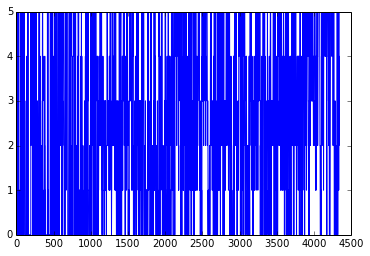

trainings set: 1.0 predicition set: 1.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
InputData = pd.read_csv('/localscratch/data/project_one/data/chart/Germany/DAX/ADS.DE_input.csv',index_col='Unnamed: 0')
OutputData= pd.read_csv('/localscratch/data/project_one/data/chart/Germany/DAX/ADS.DE_output.csv',index_col='Unnamed: 0')

In [9]:
import sys
sys.path.append('/localscratch/data/project_one/update/')
from singleStockScan import ScanModel
from sklearn.model_selection import ShuffleSplit
%load_ext autoreload
%autoreload 2

In [10]:
x = 'RFC'
print x.isin(['RFC'])

AttributeError: 'str' object has no attribute 'isin'

In [11]:
print ob.ParamGridRFC

Xfull = InputData.loc[:,InputData.columns.isin(['Date']) == False].values
Yfull = np.argmax(OutputData.loc[:,OutputData.columns.isin(['Date']) == False].values,axis=1)

# set random_state np.random.randint(1,1e6)
#Xtrain,Xval,Ytrain,Yval = train_test_split(Xfull,Yfull,self.test_size,random_state=1)
cv = ShuffleSplit(n_splits=10,test_size = 0.1,random_state=True)

out_ =  ob.gridSearchRFC(Xfull,Yfull,cv)


NameError: name 'ob' is not defined

In [148]:
print out_

(0.5436893203883495, {'max_features': 'auto', 'max_depth': 100})


In [151]:
cv = ShuffleSplit(n_splits=10,test_size = 0.1,random_state=True)


True

In [155]:
test = pd.DataFrame(columns=['Labels','ModelType','parameter','values','score','Input','ListOfFeature'])
s = ['DAI.DE','RFC','max_depth',out_[1]['max_depth'],out_[0]]

test = test.append({'Labels':'DAI.DE','ModelType':'RFC','parameter':out_[1].keys(),'values':out_[1].values(),'score':out_[0],'Input':'Single','ListOfFeature':'default'},ignore_index=True)

In [159]:
tmp= test.loc[(test['Labels'] == 'DAI.DE') &
               (test['ModelType'] == 'RFC') &
               (test['ModelType'] == 'RFC') ]
test.loc[tmp.index.tolist(),['parameter','values','score']] = [0.5,0.2,1.]
print test
#print test.loc[test[['Labels','ModelType']] ==['DAI.DE','RFC']]

   Labels ModelType  parameter  values  score   Input ListOfFeature
0  DAI.DE       RFC        0.5     0.2    1.0  Single       default


In [13]:
ob = ScanModel(ModelType='RFC',
               ListOfIndices={'Germany':['DAX']},
               PathData = '/localscratch/data/project_one/data/',n_jobs=-2)
ob.StockGridModeling()

Label:  HEI.DE prediction done
Label:  MUV2.DE prediction done
Label:  DB1.DE prediction done
Label:  TKA.DE prediction done
Label:  SIE.DE prediction done
Label:  VNA.DE prediction done
Label:  PSM.DE prediction done
Label:  DTE.DE prediction done
Label:  IFX.DE prediction done
Label:  RWE.DE prediction done
Label:  ADS.DE prediction done
Label:  BMW.DE prediction done
Label:  DPW.DE prediction done
Label:  BEI.DE prediction done
Label:  DAI.DE prediction done
Label:  LIN.DE prediction done
Label:  BAS.DE prediction done
Label:  EOAN.DE prediction done
Label:  SAP.DE prediction done
Label:  LHA.DE prediction done
Label:  ALV.DE prediction done
Label:  HEN3.DE prediction done
Label:  CBK.DE prediction done
Label:  FME.DE prediction done
Label:  CON.DE prediction done
Label:  FRE.DE prediction done
Label:  VOW3.DE prediction done
Label:  MRK.DE prediction done
Label:  BAYN.DE prediction done
Label:  DBK.DE prediction done
     Labels ModelType                     Parameters ParameterVal

In [108]:
print np.any(test.values != np.nan)

True
